In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('spam.csv', encoding='latin1')

# Display the first few rows of the dataframe
print(df.head())

# Display basic information about the dataframe
print(df.info())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
m

In [5]:
# Drop any unnecessary columns (if any exist)
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Rename the columns for easier access
df.columns = ['label', 'text']

# Display the first few rows to check the changes
print(df.head())


  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


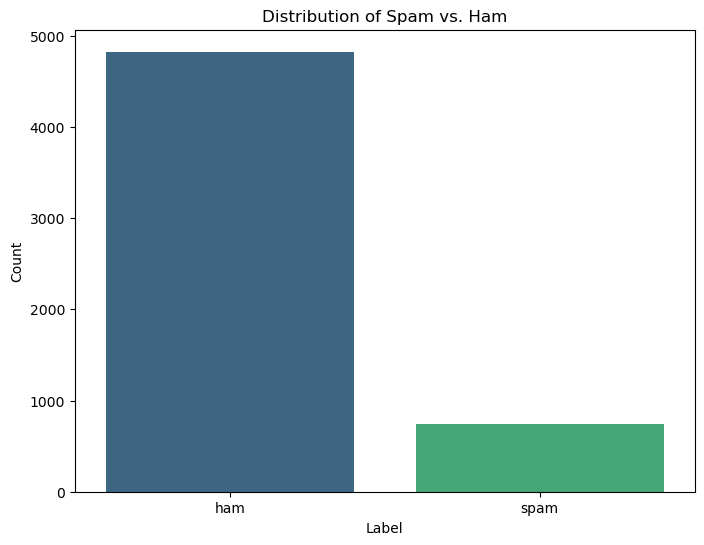

In [8]:
# Count the occurrences of each label
label_counts = df['label'].value_counts()

# Plot the distribution of labels
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Distribution of Spam vs. Ham')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


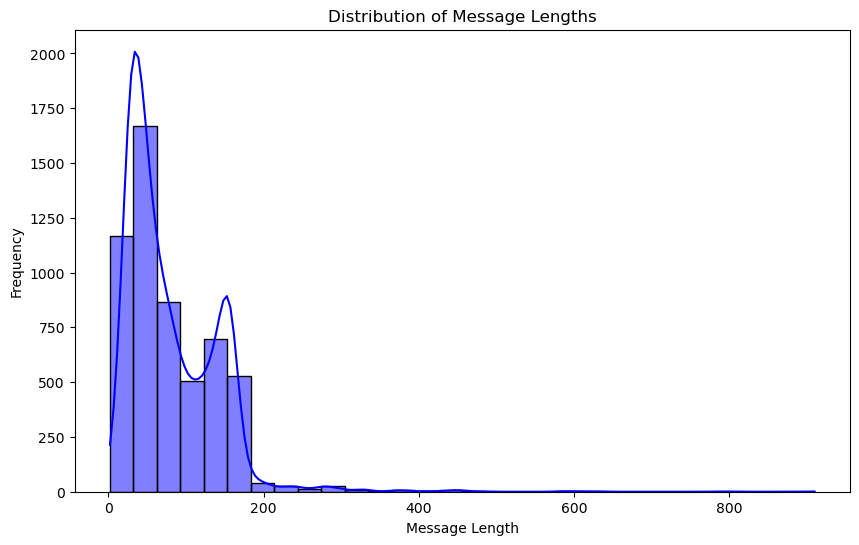

In [9]:
# Add a new column for the length of each message
df['message_length'] = df['text'].apply(len)

# Plot the distribution of message lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['message_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()


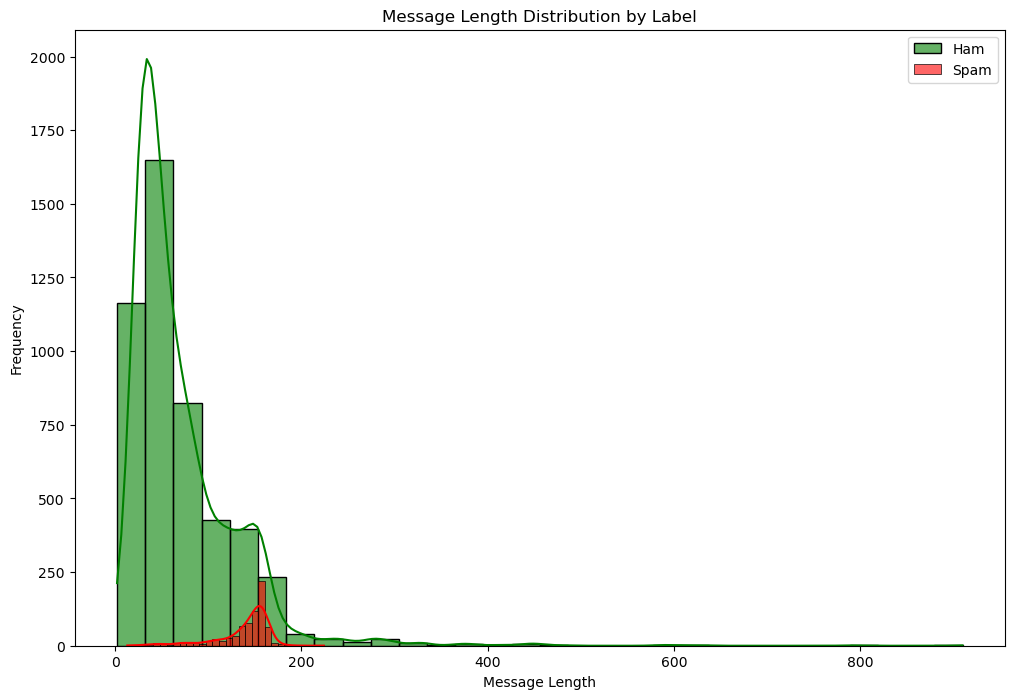

In [10]:
# Plot the distribution of message lengths for spam and ham
plt.figure(figsize=(12, 8))
sns.histplot(df[df['label'] == 'ham']['message_length'], bins=30, kde=True, color='green', label='Ham', alpha=0.6)
sns.histplot(df[df['label'] == 'spam']['message_length'], bins=30, kde=True, color='red', label='Spam', alpha=0.6)
plt.title('Message Length Distribution by Label')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
from wordcloud import WordCloud

# Function to generate a word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word clouds for spam and ham messages
spam_text = ' '.join(df[df['label'] == 'spam']['text'])
ham_text = ' '.join(df[df['label'] == 'ham']['text'])

generate_wordcloud(spam_text, 'Spam Messages Word Cloud')
generate_wordcloud(ham_text, 'Ham Messages Word Cloud')
